In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import os
sys.path.append("D:\Research\Codes\Hybrid-vpic/")
from read_field_data import loadinfo, load_data_at_certain_t, load_data
from plot_simulation_results import Species

In [2]:
def mat_shift(M):
    n1, n2 = M.shape[0], M.shape[1]
    M_shift = np.zeros_like(M)
    M_shift[0:n1//2, :] = M[n1//2:, :]
    M_shift[n1//2:, :] = M[0:n1//2, :]
    return M_shift


In [4]:
def mat_shift(M):
    # n1, n2 = M.shape[0], M.shape[1]
    # M_shift = np.zeros_like(M)
    # M_shift[0:n1//2, :] = M[n1//2:, :]
    # M_shift[n1//2:, :] = M[0:n1//2, :]
    return M

In [5]:
def region(x_data, z_data, x_left, x_right, z_bottom, z_top):
    if x_data is not None and z_data is not None:
        return (x_data >= x_left) & (x_data < x_right) & (z_data >= z_bottom) & (z_data < z_top)
    else:
        return np.zeros_like(x_data, dtype=bool)

In [6]:
def calculate_current_density(Bx, By, Bz, dx, dy, dz):
    """
    通过三维磁场旋度计算电流密度

    参数:
    Bx (numpy.ndarray): 磁场的 x 分量
    By (numpy.ndarray): 磁场的 y 分量
    Bz (numpy.ndarray): 磁场的 z 分量
    dx (float): x 方向的网格间距
    dy (float): y 方向的网格间距
    dz (float): z 方向的网格间距

    返回:
    Jx (numpy.ndarray): 电流密度的 x 分量
    Jy (numpy.ndarray): 电流密度的 y 分量
    Jz (numpy.ndarray): 电流密度的 z 分量
    """
    mu_0 = 1
    # 计算磁场的旋度
    dBz_dx = np.gradient(Bz, dx, axis=0)
    dBx_dz = np.gradient(Bx, dz, axis=1)
    dBy_dz = np.gradient(By, dz, axis=1)
    dBy_dx = np.gradient(By, dx, axis=0)

    # 由于是二维平面（xz平面），这里dBz_dy和dBx_dy为0
    Jx = -dBy_dz / mu_0
    Jy = -(dBz_dx - dBx_dz) / mu_0
    Jz = dBy_dx / mu_0

    return Jx, Jy, Jz


In [72]:
field_dir = "field_data/field_data_85/"
figs_dir = "field_figs/field_totals_85/"
nx, ny, nz = int(loadinfo(field_dir)[0]), int(loadinfo(field_dir)[1]), int(loadinfo(field_dir)[2])
Lx, Ly, Lz = int(loadinfo(field_dir)[3]), int(loadinfo(field_dir)[4]), int(loadinfo(field_dir)[5])
hx, hy, hz = Lx/nx, Ly/ny, Lz/nz
x, y, z = np.linspace(0, Lx, nx), np.linspace(0, Ly, ny), np.linspace(-Lz/2, Lz/2, nz)
X, Z = np.meshgrid(x, z)
print(nx, nz)
epoch = 20
v_A=1
b0=1
nb = 1
delta = 0.5
for epoch in range(75):
    print(epoch)
 
    bx = load_data_at_certain_t(field_dir+"bx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    by = load_data_at_certain_t(field_dir+"by.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    bz = load_data_at_certain_t(field_dir+"bz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ex = load_data_at_certain_t(field_dir+"ex.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ey = load_data_at_certain_t(field_dir+"ey.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ez = load_data_at_certain_t(field_dir+"ez.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ni_c = load_data_at_certain_t(field_dir+"ni.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ni_b = load_data_at_certain_t(field_dir+"ni2.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # ne = load_data_at_certain_t(field_dir+"ne.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jx = load_data_at_certain_t(field_dir+"jx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jy = load_data_at_certain_t(field_dir+"jy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jz = load_data_at_certain_t(field_dir+"jz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    jx, jy, jz = calculate_current_density(bx, by, bz, hx, hy, hz)

    uix_c = load_data_at_certain_t(field_dir+"uix.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiy_c = load_data_at_certain_t(field_dir+"uiy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiz_c = load_data_at_certain_t(field_dir+"uiz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    
    uix_b = load_data_at_certain_t(field_dir+"ui2x.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiy_b = load_data_at_certain_t(field_dir+"ui2y.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiz_b = load_data_at_certain_t(field_dir+"ui2z.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)

    uix_total = (uix_c*ni_c+uix_b*ni_b)/(ni_c+ni_b)
    uiy_total = (uiy_c*ni_c+uiy_b*ni_b)/(ni_c+ni_b)
    uiz_total = (uiz_c*ni_c+uiz_b*ni_b)/(ni_c+ni_b)
    
    pic_xx = load_data_at_certain_t(field_dir+"pi-xx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pic_yy = load_data_at_certain_t(field_dir+"pi-yy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pic_zz = load_data_at_certain_t(field_dir+"pi-zz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)

    pib_xx = load_data_at_certain_t(field_dir+"pi2-xx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pib_yy = load_data_at_certain_t(field_dir+"pi2-yy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pib_zz = load_data_at_certain_t(field_dir+"pi2-zz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    
    Ti = (pic_xx+pic_yy+pic_zz)/3/ni_c

    ez_hall = -jy * bx / (ni_c+ni_b)
    ez_pressure = -np.gradient((pic_xx + pic_yy + pic_zz + pib_xx + pib_yy + pib_zz) / 3, axis=1) / hz / (ni_c+ni_b)
    ez_ion = uiy_total * bx
    ez_calc = ez_hall + ez_pressure + ez_ion
    ez_hall_theory = -np.sinh(Z.T/delta) / np.cosh(Z.T/delta) ** 3 / (nb + 1 / np.cosh(Z.T/delta) ** 2)/delta
    ez_pressure_theory = 0.5 * np.sinh(Z.T/delta) / np.cosh(Z.T/delta) ** 3 / (nb + 1 / np.cosh(Z.T/delta) ** 2)/delta
    uiy_theory = 0.5 / np.cosh(Z.T/delta) ** 2 / (nb + 1 / np.cosh(Z.T/delta) ** 2)/delta
    ez_ion_theory = uiy_theory * np.tanh(Z.T/delta)
    ez_theory = ez_ion_theory + ez_hall_theory + ez_pressure_theory
    print(Ti[0, nz//2])
    # uex = load_data_at_certain_t(field_dir+"uex.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # uey = load_data_at_certain_t(field_dir+"uey.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # uez = load_data_at_certain_t(field_dir+"uez.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ni_0 = load_data_at_certain_t(field_dir+"ni.gda", i_t=0, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # print(Lx, Ly, Lz)
    if not os.path.exists(figs_dir):
        os.mkdir(figs_dir)
    
    fig, axes = plt.subplots(3, 2, figsize=(20, 18))
    ax =axes[0, 0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(bx).T, cmap='bwr', vmin=-1, vmax=1)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label("Bx/B0", fontsize=20)
    
    ax =axes[0, 1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(ex).T, cmap='bwr', vmin=-0.05, vmax=0.05)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$E_x/B_0 V_A$", fontsize=20)
    
    ax =axes[1, 0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(by).T, cmap='bwr', vmin=-0.2, vmax=0.2)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label("By/B0", fontsize=20)
    ax =axes[1, 1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(ey).T, cmap='jet', vmin=0, vmax=0.3)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$E_y/B_0V_A$", fontsize=20)
    ax =axes[2, 0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(bz).T, cmap='bwr', vmin=-0.4, vmax=0.4)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label("Bz/B0", fontsize=20)
    
    ax =axes[2, 1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(ez).T, cmap='bwr')
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$E_z/B_0 V_A$", fontsize=20)
    plt.suptitle(fr"Hybrid:$Epoch={epoch}, \Delta B_{{z0}}=0.01B_0$", fontsize=25)
    plt.savefig(figs_dir+f"fig_{epoch}.png")
    plt.close()


128 256
0
0.25576463
1
0.27384692
2
0.29691878
3
0.29912922
4
0.30989942
5
0.31031597
6
0.31648347
7
0.31241426
8
0.308871
9
0.3242482
10
0.3332555
11
0.32587588
12
0.3286669
13
0.3212693
14
0.3234591
15
0.33024213
16
0.3266834
17
0.3296842
18
0.3215968
19
0.31790528
20
0.30986574
21
0.32507783
22
0.31872022
23
0.32729515
24
0.3333202
25
0.348419
26
0.35632634
27
0.36470002
28
0.3610107
29
0.37763408
30
0.3567462
31
0.36697218
32
0.36487877
33
0.3755784
34
0.37190893
35
0.3828528
36
0.36499843
37
0.3757348
38
0.3750171
39
0.38078156
40
0.38627276
41
0.39051825
42
0.4080705
43
0.3971342
44
0.3935231
45
0.39084157
46
0.38505456
47
0.3927621
48
0.35885093
49
0.37679344
50
0.37098444
51
0.35939002
52
0.3582247
53
0.34736463
54
0.3717222
55
0.37847668
56
0.40022877
57
0.41735432
58
0.4222093
59
0.42962924
60
0.43499637
61
0.42162284
62
0.39820957
63
0.3888234
64
0.39845034
65
0.38517064
66
0.37857085
67
0.36879805
68
0.34891477
69
0.33206576
70
0.34858164
71
0.33778605
72
0.31677854
73
0.34

(50.0, 70.0)

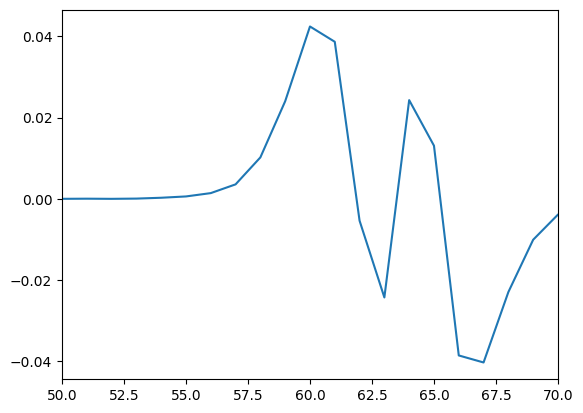

In [12]:
plt.plot(ez_hall[1,:]-ez_hall_theory[1,:])
# plt.plot(ez_hall_theory[1,:])
# plt.plot((ez)[0,:])
# plt.plot((nb + 1 / np.cosh(Z.T/0.5) ** 2)[0,:])
# plt.plot((ni_c+ni_b)[0,:])
plt.xlim([50,70])

In [78]:
'''
PLOT MOMENT DATA
'''
field_dir = "field_data/field_data_85/"
figs_dir = "field_figs/moment_totals_85/"
nx, ny, nz = int(loadinfo(field_dir)[0]), int(loadinfo(field_dir)[1]), int(loadinfo(field_dir)[2])
print(nx, nz)
Lx, Ly, Lz = int(loadinfo(field_dir)[3]), int(loadinfo(field_dir)[4]), int(loadinfo(field_dir)[5])
hx, hy, hz = Lx/nx, Ly/ny, Lz/nz
epoch = 20
v_A=1
b0 = 1
di = 1
for epoch in range(75):
    print(epoch)
 
    bx = load_data_at_certain_t(field_dir+"bx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    by = load_data_at_certain_t(field_dir+"by.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    bz = load_data_at_certain_t(field_dir+"bz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ex = load_data_at_certain_t(field_dir+"ex.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ey = load_data_at_certain_t(field_dir+"ey.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ez = load_data_at_certain_t(field_dir+"ez.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ni_c = load_data_at_certain_t(field_dir+"ni.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ni_b = load_data_at_certain_t(field_dir+"ni2.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # ne = load_data_at_certain_t(field_dir+"ne.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jx = load_data_at_certain_t(field_dir+"jx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jy = load_data_at_certain_t(field_dir+"jy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jz = load_data_at_certain_t(field_dir+"jz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    jx, jy, jz = calculate_current_density(bx, by, bz, hx, hy, hz)
    uix_c = load_data_at_certain_t(field_dir+"uix.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiy_c = load_data_at_certain_t(field_dir+"uiy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiz_c = load_data_at_certain_t(field_dir+"uiz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uix_b = load_data_at_certain_t(field_dir+"ui2x.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiy_b = load_data_at_certain_t(field_dir+"ui2y.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiz_b = load_data_at_certain_t(field_dir+"ui2z.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uex = (uix_c*ni_c+uix_b*ni_b-jx)/(ni_c+ni_b)
    uey = (uiy_c*ni_c+uiy_b*ni_b-jy)/(ni_c+ni_b)
    uez = (uiz_c*ni_c+uiz_b*ni_b-jz)/(ni_c+ni_b)
    pi_xx = load_data_at_certain_t(field_dir+"pi-xx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pi_yy = load_data_at_certain_t(field_dir+"pi-yy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pi_zz = load_data_at_certain_t(field_dir+"pi-zz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # Ti = (pi_xx+pi_yy+pi_zz)/3/ni_c
    # Ti_x, Ti_y, Ti_z = pi_xx/ni, pi_yy/ni, pi_zz/ni
    # uex = load_data_at_certain_t(field_dir+"uex.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # uey = load_data_at_certain_t(field_dir+"uey.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # uez = load_data_at_certain_t(field_dir+"uez.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ni_0 = load_data_at_certain_t(field_dir+"ni.gda", i_t=0, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    print(Lx, Ly, Lz)
    if not os.path.exists(figs_dir):
        os.mkdir(figs_dir)
    x, y, z = np.linspace(0, Lx/di, nx), np.linspace(0, Ly/di, ny), np.linspace(-Lz/di/2, Lz/di/2, nz)
    fig, axes = plt.subplots(4, 4, figsize=(45, 18))
    '''
    PLOT CORE ION MOMENTS
    '''
    ax =axes[0,0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=1)
    pclr=ax.pcolormesh(x, z, mat_shift(ni_c).T, cmap='jet', vmin=0, vmax=2)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$n_c$", fontsize=20)
    
    
    
    ax =axes[1, 0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(uix_c).T/v_A, cmap='bwr')
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$u_{ix,c}/V_A$", fontsize=20)
   
    ax =axes[2,0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(uiy_c).T/v_A, cmap='bwr', vmin=-0.6, vmax=0.6)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$u_{iy,c}/V_A$", fontsize=20)
    
 
    ax =axes[3,0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(uiz_c).T/v_A, cmap='bwr')
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$u_{iz,c}/V_A$", fontsize=20)
    '''
    PLOT BEAM ION MOMENTS
    '''
   
    ax =axes[0, 1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(ni_b).T, cmap='jet', vmin=0, vmax=1)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$n_b$", fontsize=20)
    ax =axes[1, 1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(uix_b).T/v_A, cmap='bwr', vmin=-1, vmax=1)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$u_{ix,b}/V_A$", fontsize=20)
    ax =axes[2, 1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(uiy_b).T/v_A, cmap='jet', vmin=-0.6, vmax=0.6)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$u_{iy,b}/V_A$", fontsize=20)
    ax =axes[3, 1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(uiz_b).T/v_A, cmap='jet', vmin=-0.4, vmax=0.4)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$u_{iz,b}/V_A$", fontsize=20)
    '''
    PLOT ELECTRON MOMENTS
    '''
    ax =axes[0, 2]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(ni_b+ni_c).T, cmap='jet', vmin=0, vmax=1.5)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$n_e$", fontsize=20)
    ax =axes[1, 2]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(uex).T/v_A, cmap='bwr')
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$u_{ex}/V_A$", fontsize=20)
    ax =axes[2, 2]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(uey).T/v_A, cmap='jet')
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$u_{ey}/V_A$", fontsize=20)
    ax =axes[3, 2]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(uez).T/v_A, cmap='jet')
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$u_{ez}/V_A$", fontsize=20)
    '''
    PLOT DELTA MOMENTS
    '''
    ax =axes[0, 3]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(uix_b-uix_c).T, cmap='jet', vmin=0, vmax=1.5)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$u_{ix,b}-u{ix,c}$", fontsize=20)
    ax =axes[1, 3]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(jx).T/v_A, cmap='bwr', vmin=-1.5, vmax=1.5)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$\Delta u_x/V_A$", fontsize=20)
    ax =axes[2, 3]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(jy).T/v_A, cmap='bwr', vmin=-3, vmax=3)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$\Delta u_y/V_A$", fontsize=20)
    ax =axes[3, 3]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(jz).T/v_A, cmap='bwr', vmin=-0.5, vmax=0.5)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$\Delta u_z/V_A$", fontsize=20)
    plt.suptitle(fr"Hybrid:$Epoch={epoch}, \Delta B_{{z0}}=0.01B_0$", fontsize=25)
    plt.savefig(figs_dir+f"fig_{epoch}.png")
    plt.close()
    

128 256
0
64 1 64
1
64 1 64
2
64 1 64
3
64 1 64
4
64 1 64
5
64 1 64
6
64 1 64
7
64 1 64
8
64 1 64
9
64 1 64
10
64 1 64
11
64 1 64
12
64 1 64
13
64 1 64
14
64 1 64
15
64 1 64
16
64 1 64
17
64 1 64
18
64 1 64
19
64 1 64
20
64 1 64
21
64 1 64
22
64 1 64
23
64 1 64
24
64 1 64
25
64 1 64
26
64 1 64
27
64 1 64
28
64 1 64
29
64 1 64
30
64 1 64
31
64 1 64
32
64 1 64
33
64 1 64
34
64 1 64
35
64 1 64
36
64 1 64
37
64 1 64
38
64 1 64
39
64 1 64
40
64 1 64
41
64 1 64
42
64 1 64
43
64 1 64
44
64 1 64
45
64 1 64
46
64 1 64
47
64 1 64
48
64 1 64
49
64 1 64
50
64 1 64
51
64 1 64
52
64 1 64
53
64 1 64
54
64 1 64
55
64 1 64
56
64 1 64
57
64 1 64
58
64 1 64
59
64 1 64
60
64 1 64
61
64 1 64
62
64 1 64
63
64 1 64
64
64 1 64
65
64 1 64
66
64 1 64
67
64 1 64
68
64 1 64
69
64 1 64
70
64 1 64
71
64 1 64
72
64 1 64
73
64 1 64
74
64 1 64


0.2319639


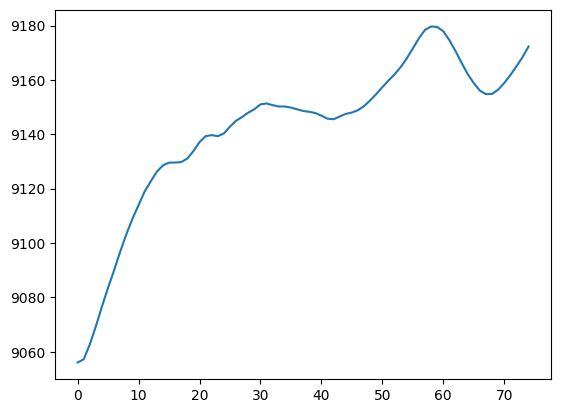

In [80]:
field_dir = "field_data/field_data_85/"
nx, ny, nz = int(loadinfo(field_dir)[0]), int(loadinfo(field_dir)[1]), int(loadinfo(field_dir)[2])
uix_total = load_data(field_dir+'uix.gda',nx,nz,75)
uiz_total = load_data(field_dir+'uiz.gda',nx,nz,75)
ni_total = load_data(field_dir+'ni.gda',nx,nz,75)
ey_total = load_data(field_dir+'ey.gda',nx,nz,75)
# plt.plot(np.sum(uix_total[:,0,:]*ni_total[:,0,:],axis=0))
# plt.plot(np.sum(uiz_total[0,:,:]*ni_total[0,:,:],axis=0))
# plt.plot(uiz_total[64,:,40])
plt.plot(np.sum(ni_total,axis=(0,1)))
# plt.plot(ey_total[nx//2,nz//2,:])
print(ni_total[0,100,0])

In [ ]:
'''
PLOT TEMPERATURE DISTRIBUTION
'''
field_dir = "field_data/field_data_70/"
figs_dir = "field_figs/temperatures_70/"
nx, ny, nz = int(loadinfo(field_dir)[0]), int(loadinfo(field_dir)[1]), int(loadinfo(field_dir)[2])
Lx, Ly, Lz = int(loadinfo(field_dir)[3]), int(loadinfo(field_dir)[4]), int(loadinfo(field_dir)[5])
hx, hy, hz = Lx/nx, Ly/ny, Lz/nz
x, y, z = np.linspace(0, Lx, nx), np.linspace(0, Ly, ny), np.linspace(-Lz/2, Lz/2, nz)
X, Z = np.meshgrid(x, z)
print(nx, nz)
epoch = 20
v_A=1
b0=1
nb = 1
delta = 0.5
for epoch in range(65):
    print(epoch)
 
    bx = load_data_at_certain_t(field_dir+"bx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    by = load_data_at_certain_t(field_dir+"by.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    bz = load_data_at_certain_t(field_dir+"bz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ex = load_data_at_certain_t(field_dir+"ex.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ey = load_data_at_certain_t(field_dir+"ey.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ez = load_data_at_certain_t(field_dir+"ez.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ni_c = load_data_at_certain_t(field_dir+"ni.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ni_b = load_data_at_certain_t(field_dir+"ni2.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # ne = load_data_at_certain_t(field_dir+"ne.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jx = load_data_at_certain_t(field_dir+"jx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jy = load_data_at_certain_t(field_dir+"jy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jz = load_data_at_certain_t(field_dir+"jz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    jx, jy, jz = calculate_current_density(bx, by, bz, hx, hy, hz)

    uix_c = load_data_at_certain_t(field_dir+"uix.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiy_c = load_data_at_certain_t(field_dir+"uiy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiz_c = load_data_at_certain_t(field_dir+"uiz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    
    uix_b = load_data_at_certain_t(field_dir+"ui2x.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiy_b = load_data_at_certain_t(field_dir+"ui2y.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiz_b = load_data_at_certain_t(field_dir+"ui2z.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)

    uix_total = (uix_c*ni_c+uix_b*ni_b)/(ni_c+ni_b)
    uiy_total = (uiy_c*ni_c+uiy_b*ni_b)/(ni_c+ni_b)
    uiz_total = (uiz_c*ni_c+uiz_b*ni_b)/(ni_c+ni_b)
    
    pic_xx = load_data_at_certain_t(field_dir+"pi-xx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pic_yy = load_data_at_certain_t(field_dir+"pi-yy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pic_zz = load_data_at_certain_t(field_dir+"pi-zz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)

    pib_xx = load_data_at_certain_t(field_dir+"pi2-xx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pib_yy = load_data_at_certain_t(field_dir+"pi2-yy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pib_zz = load_data_at_certain_t(field_dir+"pi2-zz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    
    Ti_c = (pic_xx+pic_yy+pic_zz)/3/ni_c
    Tic_xx, Tic_yy, Tic_zz = pic_xx/ni_c, pic_yy/ni_c, pic_zz/ni_c
    Tib_xx, Tib_yy, Tib_zz = pib_xx/ni_b, pib_yy/ni_b, pib_zz/ni_b

 
    ez_hall = -jy * bx / (ni_c+ni_b)
    ez_pressure = -np.gradient((pic_xx + pic_yy + pic_zz + pib_xx + pib_yy + pib_zz) / 3, axis=1) / hz / (ni_c+ni_b)
    ez_ion = uiy_total * bx
    ez_calc = ez_hall + ez_pressure + ez_ion
    ez_hall_theory = -np.sinh(Z.T/delta) / np.cosh(Z.T/delta) ** 3 / (nb + 1 / np.cosh(Z.T/delta) ** 2)/delta
    ez_pressure_theory = 0.5 * np.sinh(Z.T/delta) / np.cosh(Z.T/delta) ** 3 / (nb + 1 / np.cosh(Z.T/delta) ** 2)/delta
    uiy_theory = 0.5 / np.cosh(Z.T/delta) ** 2 / (nb + 1 / np.cosh(Z.T/delta) ** 2)/delta
    ez_ion_theory = uiy_theory * np.tanh(Z.T/delta)
    ez_theory = ez_ion_theory + ez_hall_theory + ez_pressure_theory
    print(Ti[0, nz//2])
    # uex = load_data_at_certain_t(field_dir+"uex.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # uey = load_data_at_certain_t(field_dir+"uey.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # uez = load_data_at_certain_t(field_dir+"uez.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ni_0 = load_data_at_certain_t(field_dir+"ni.gda", i_t=0, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # print(Lx, Ly, Lz)
    if not os.path.exists(figs_dir):
        os.mkdir(figs_dir)
    
    fig, axes = plt.subplots(3, 2, figsize=(20, 18))
    ax =axes[0, 0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(Tic_xx).T, cmap='jet', vmin=0, vmax=0.5)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label("Bx/B0", fontsize=20)
    
    ax =axes[0, 1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(Tib_xx).T, cmap='jet', vmin=0, vmax=0.5)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$E_x/B_0 V_A$", fontsize=20)
    
    ax =axes[1, 0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(Tic_yy).T, cmap='jet', vmin=0, vmax=0.5)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label("By/B0", fontsize=20)
    ax =axes[1, 1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(Tib_yy).T, cmap='jet', vmin=0, vmax=0.5)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$E_y/B_0V_A$", fontsize=20)
    ax =axes[2, 0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(Tic_zz).T, cmap='jet')
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label("Bz/B0", fontsize=20)
    
    ax =axes[2, 1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(Tib_zz).T, cmap='jet')
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$E_z/B_0 V_A$", fontsize=20)
    plt.suptitle(fr"Hybrid:$Epoch={epoch}, \Delta B_{{z0}}=0.01B_0$", fontsize=25)
    plt.savefig(figs_dir+f"fig_{epoch}.png")
    plt.close()

256 128
0
2.0610368
1
2.0610368
2
2.0610368
3
2.0610368
4
2.0610368
5
2.0610368
6
2.0610368
7
2.0610368
8
2.0610368
9
2.0610368
10
2.0610368
11
2.0610368
12
2.0610368
13
2.0610368
14
2.0610368
15
2.0610368
16
2.0610368
17
2.0610368
18
2.0610368
19
2.0610368
20
2.0610368
21
2.0610368
22
2.0610368
23
2.0610368
24
2.0610368
25
2.0610368
26
2.0610368
27
2.0610368
28
2.0610368
29
2.0610368
30
2.0610368
31
2.0610368
32
2.0610368
33
2.0610368
34
2.0610368
35
2.0610368
36
2.0610368
37
2.0610368
38
2.0610368
39
2.0610368
40
2.0610368
41
2.0610368
42
2.0610368
43
2.0610368
44
2.0610368
45
2.0610368
46
2.0610368
47
2.0610368
48
2.0610368
49
2.0610368
50
2.0610368
51
2.0610368
52
2.0610368
53
2.0610368
54
2.0610368
55
2.0610368
56
2.0610368
57
2.0610368
58
2.0610368
59
2.0610368
60
2.0610368
61
2.0610368
62
2.0610368
63
2.0610368
64
2.0610368


In [ ]:
'''
PLOT MASS FLUX DATA
'''
field_dir = "field_data/field_data_79/"
figs_dir = "field_figs/flux_totals_79/"
nx, ny, nz = int(loadinfo(field_dir)[0]), int(loadinfo(field_dir)[1]), int(loadinfo(field_dir)[2])
print(nx, nz)
Lx, Ly, Lz = int(loadinfo(field_dir)[3]), int(loadinfo(field_dir)[4]), int(loadinfo(field_dir)[5])
hx, hy, hz = Lx/nx, Ly/ny, Lz/nz
epoch = 20
v_A=1
b0 = 1
di = 1
ni_c0 = load_data_at_certain_t(field_dir+"ni.gda", i_t=0, num_dim1=nx, num_dim2=ny, num_dim3=nz)
ni_b0 = load_data_at_certain_t(field_dir+"ni2.gda", i_t=0, num_dim1=nx, num_dim2=ny, num_dim3=nz)
for epoch in range(50):
    print(epoch)
 
    bx = load_data_at_certain_t(field_dir+"bx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    by = load_data_at_certain_t(field_dir+"by.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    bz = load_data_at_certain_t(field_dir+"bz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ex = load_data_at_certain_t(field_dir+"ex.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ey = load_data_at_certain_t(field_dir+"ey.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ez = load_data_at_certain_t(field_dir+"ez.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ni_c = load_data_at_certain_t(field_dir+"ni.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    ni_b = load_data_at_certain_t(field_dir+"ni2.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # ne = load_data_at_certain_t(field_dir+"ne.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jx = load_data_at_certain_t(field_dir+"jx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jy = load_data_at_certain_t(field_dir+"jy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # jz = load_data_at_certain_t(field_dir+"jz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    jx, jy, jz = calculate_current_density(bx, by, bz, hx, hy, hz)
    uix_c = load_data_at_certain_t(field_dir+"uix.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiy_c = load_data_at_certain_t(field_dir+"uiy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiz_c = load_data_at_certain_t(field_dir+"uiz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uix_b = load_data_at_certain_t(field_dir+"ui2x.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiy_b = load_data_at_certain_t(field_dir+"ui2y.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uiz_b = load_data_at_certain_t(field_dir+"ui2z.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    uex = (uix_c*ni_c+uix_b*ni_b-jx)/(ni_c+ni_b)
    uey = (uiy_c*ni_c+uiy_b*ni_b-jy)/(ni_c+ni_b)
    uez = (uiz_c*ni_c+uiz_b*ni_b-jz)/(ni_c+ni_b)
    pi_xx = load_data_at_certain_t(field_dir+"pi-xx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pi_yy = load_data_at_certain_t(field_dir+"pi-yy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    pi_zz = load_data_at_certain_t(field_dir+"pi-zz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # Ti = (pi_xx+pi_yy+pi_zz)/3/ni_c
    # Ti_x, Ti_y, Ti_z = pi_xx/ni, pi_yy/ni, pi_zz/ni
    # uex = load_data_at_certain_t(field_dir+"uex.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # uey = load_data_at_certain_t(field_dir+"uey.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    # uez = load_data_at_certain_t(field_dir+"uez.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
    
    print(Lx, Ly, Lz)
    if not os.path.exists(figs_dir):
        os.mkdir(figs_dir)
    x, y, z = np.linspace(0, Lx/di, nx), np.linspace(0, Ly/di, ny), np.linspace(-Lz/di/2, Lz/di/2, nz)
    fig, axes = plt.subplots(3, 2, figsize=(25, 18))
  
    ax =axes[0,0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=1)
    pclr=ax.pcolormesh(x, z, mat_shift(ni_c*uix_c).T, cmap='bwr', vmin=-0.6, vmax=0.6)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$F_c$", fontsize=20)
    
    
    
    ax =axes[1,0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(ni_b*uix_b).T, cmap='bwr', vmin=-0.6, vmax=0.6)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$F_b$", fontsize=20)
   
    ax =axes[2,0]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift((ni_b+ni_c)*uex).T, cmap='bwr', vmin=-0.6, vmax=0.6)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$F_e$", fontsize=20)

    ax =axes[0,1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=1)
    pclr=ax.pcolormesh(x, z, mat_shift(ni_c*uiz_c).T, cmap='bwr', vmin=-0.1, vmax=0.1)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$F_c$", fontsize=20)
    
    
    
    ax =axes[1,1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift(ni_b*uiz_b).T, cmap='bwr', vmin=-0.1, vmax=0.1)
    
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$F_b$", fontsize=20)
   
    ax =axes[2,1]
    ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    pclr=ax.pcolormesh(x, z, mat_shift((ni_b+ni_c)*uez).T, cmap='bwr', vmin=-0.1, vmax=0.1)
    cbar=plt.colorbar(pclr, ax=ax)
    cbar.set_label(r"$F_e$", fontsize=20)
    if not os.path.exists(figs_dir):
        os.mkdir(figs_dir)
    plt.suptitle(fr"Hybrid:$Epoch={epoch}, \Delta B_{{z0}}=0.01B_0$", fontsize=25)
    plt.savefig(figs_dir+f"fig_{epoch}.png")
    plt.close()
 
    # ax =axes[3,0]
    # ax.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=0.5)
    # pclr=ax.pcolormesh(x, z, mat_shift(uiz_c).T/v_A, cmap='bwr', vmin=-0.4, vmax=0.4)
    # cbar=plt.colorbar(pclr, ax=ax)
    # cbar.set_label(r"$u_{iz,c}/V_A$", fontsize=20)

256 128
0
128 1 32
1
128 1 32
2
128 1 32
3
128 1 32
4
128 1 32
5
128 1 32
6
128 1 32
7
128 1 32
8
128 1 32
9
128 1 32
10
128 1 32
11
128 1 32
12
128 1 32
13
128 1 32
14
128 1 32
15
128 1 32
16
128 1 32
17
128 1 32
18
128 1 32
19
128 1 32
20
128 1 32
21
128 1 32
22
128 1 32
23
128 1 32
24
128 1 32
25
128 1 32
26
128 1 32
27
128 1 32
28
128 1 32
29
128 1 32
30
128 1 32
31
128 1 32
32
128 1 32
33
128 1 32
34
128 1 32
35
128 1 32
36
128 1 32
37
128 1 32
38
128 1 32
39
128 1 32
40
128 1 32
41
128 1 32
42
128 1 32
43
128 1 32
44
128 1 32
45
128 1 32
46
128 1 32
47
128 1 32
48
128 1 32
49
128 1 32


C:\Users\mrwwn\AppData\Local\Temp\ipykernel_23356\1405710775.py:83: RuntimeWarning: divide by zero encountered in log10
  ctf = ax2.contourf(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), cmap="jet")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_23356\1405710775.py:84: RuntimeWarning: divide by zero encountered in log10
  ax2.contour(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), colors="k")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_23356\1405710775.py:91: RuntimeWarning: divide by zero encountered in log10
  ctf = ax3.contourf(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), cmap="jet")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_23356\1405710775.py:92: RuntimeWarning: divide by zero encountered in log10
  ax3.contour(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), colors="k")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_23356\1405710775.py:99: RuntimeWarning: divide by zero encountered in log10
  ctf = ax4.contourf(xedges_b[1:], zedges_b[1:], np.log10(counts_m

Text(0, 0.5, 'vy')

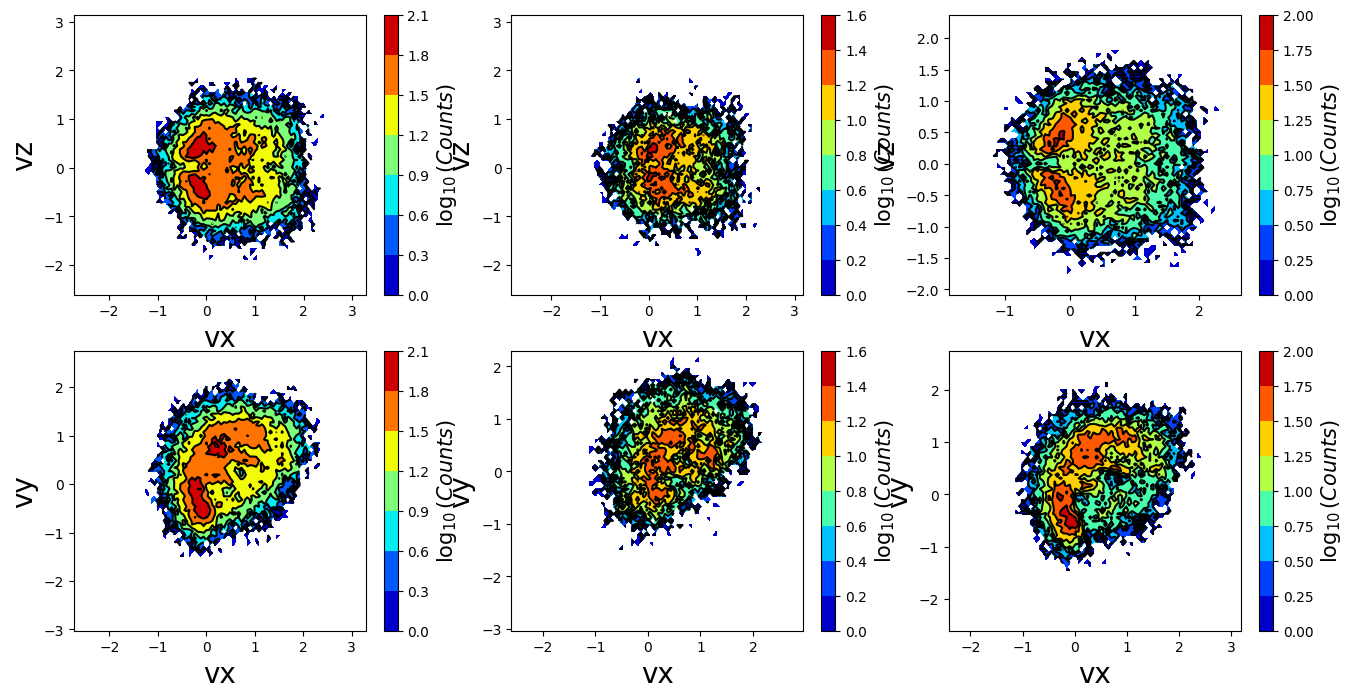

In [ ]:
"""
PLOT SINGLE VDF
"""
num_files=256
run_case_index = 85
step = 24000
nx, ny, nz = int(loadinfo(field_dir)[0]), int(loadinfo(field_dir)[1]), int(loadinfo(field_dir)[2])
x_left, x_right, z_bottom, z_top = 40, 45, -0.25, 0.25
# x_left, x_right, z_bottom, z_top = 20, 30, z_lst[i], z_lst[i+1]
base_fname_swi_c = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_c.{step}.{{}}"
base_fname_swi_b = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_b.{step}.{{}}"
p_c = Species(name="ion_c", fullname="Ion_core", filename=base_fname_swi_c, num_files=num_files, region=[x_left, x_right, z_bottom, z_top])
p_b = Species(name="ion_b", fullname="Ion_beam", filename=base_fname_swi_b, num_files=num_files, region=[x_left, x_right, z_bottom, z_top])
condition_b = region(p_b.x, p_b.z, x_left, x_right, z_bottom, z_top)
condition_c = region(p_c.x, p_c.z, x_left, x_right, z_bottom, z_top)
x_total, y_total, z_total = np.concatenate((p_c.x[condition_c], p_b.x[condition_b])), np.concatenate((p_c.y[condition_c], p_b.y[condition_b])), np.concatenate(
            (p_c.z[condition_c], p_b.z[condition_b]))
ux_total, uy_total, uz_total = np.concatenate((p_c.ux[condition_c], p_b.ux[condition_b])), np.concatenate(
            (p_c.uy[condition_c], p_b.uy[condition_b])), np.concatenate((p_c.uz[condition_c], p_b.uz[condition_b]))


counts_mat_c, xedges_c, zedges_c = np.histogram2d(p_c.ux[condition_c],
                                                    p_c.uz[condition_c], bins=[80, 80],
                                                    range=[[np.min(p_c.ux), np.max(p_c.ux)],
                                                            [np.min(p_c.uz), np.max(p_c.uz)]])
try:
    counts_mat_b, xedges_b, zedges_b = np.histogram2d(p_b.ux[condition_b],
                                                        p_b.uz[condition_b],
                                                        bins=[80, 80],
                                                        range=[[np.min(p_b.ux), np.max(p_b.ux)],
                                                                [np.min(p_b.uz), np.max(p_b.uz)]])
    counts_mat_t, xedges_t, zedges_t = np.histogram2d(ux_total,
                                                        uz_total, bins=[80, 80],
                                                        range=[[np.min(ux_total), np.max(ux_total)],
                                                                [np.min(uz_total), np.max(uz_total)]])
except:
    counts_mat_b = np.zeros_like(counts_mat_c)
    counts_mat_t = np.zeros_like(counts_mat_c)




fig = plt.figure(figsize=(16,8))

# 使用gridspec创建2行3列的网格，但第一行只使用一个子图（横跨3列）
gs = gridspec.GridSpec(2, 3, figure=fig, height_ratios=[1, 1])
x_plot_range = np.array(range(nx//2, nx), dtype=int)
x_range_shift = np.array((x_plot_range+nx//2)%nx)
# 上方的子图（横跨3列）
# ax1 = fig.add_subplot(gs[0, :])
# ax1.streamplot(x[x_range_shift], z, mat_shift(bx)[x_range_shift, :].T, mat_shift(bz)[x_range_shift, :].T, color='k', density=0.5)
# pclr=ax1.pcolormesh(x[x_range_shift], z, mat_shift((ni_c*uix_c+ni_b*uix_b)/(ni_c+ni_b))[x_range_shift, :].T/v_A, cmap='bwr', vmin=-1, vmax=1)

# # cbar=plt.colorbar(pclr, ax=ax1)
# # cbar.set_label(r"$\Delta u_x/V_A$", fontsize=20)
# ax1.set_xlabel("x[di]",fontsize=15)
# ax1.set_ylabel("z[di]",fontsize=15)
# ax1.scatter((x_center+128)%256, z_center, color='k', s=70)
# ax1.axhline(y=0,linewidth=3,c='k',xmin=0.5, xmax=1)
# ax1.axvline((x_center+128)%256,linewidth=3,c='k',linestyle='--')
# ax = fig.add_subplot(gs[1,:])
# ax.plot(x[x_range_shift], uix_c[x_plot_range,nz//2]/v_A, label="core", c='b')
# ax.plot(x[x_range_shift], uix_b[x_plot_range,nz//2]/v_A, label="beam", c='r')
# ax.axvline(x_center+x[nx//2], c='k', linestyle='--',linewidth=3)
# ax.set_xlim([x[nx//2], x[-1]])
# # ax.set_xlim([x[0], x[nx//2]])
# ax.set_ylabel(r"$U_i$", fontsize=25)
# ax = fig.add_subplot(gs[2,:])
# ax.plot(x[x_range_shift], ni_c[x_plot_range,nz//2], label="core", c='b')
# ax.plot(x[x_range_shift], ni_b[x_plot_range,nz//2], label="beam", c='r')
# ax.axvline(x_center+x[nx//2], c='k', linestyle='--',linewidth=3)
# ax.set_xlim([x[nx//2], x[-1]])
# #ax.set_xlim([x[0], x[nx//2]])
# ax.set_ylabel(r"$n_i$", fontsize=25)
# ax = fig.add_subplot(gs[3,:])
# ax.plot(x[x_range_shift], Ti_c[x_plot_range,nz//2], label="core", c='b')
# ax.axvline(x_center+x[nx//2], c='k', linestyle='--',linewidth=3)
# ax.plot(x[x_range_shift], Ti_b[x_plot_range, nz//2], label="beam", c='r')
# ax.set_xlim([x[nx//2], x[-1]])
# # ax.set_xlim([x[0], x[nx//2]])
# ax.set_ylabel(r"$T_i$", fontsize=25)
ax2 = fig.add_subplot(gs[0, 0])
ctf = ax2.contourf(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), cmap="jet")
ax2.contour(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), colors="k")
cbar = plt.colorbar(ctf, ax=ax2)
cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
ax2.axis('equal')
ax2.set_xlabel("vx", fontsize=20)
ax2.set_ylabel("vz", fontsize=20)
ax3 = fig.add_subplot(gs[0, 1])
ctf = ax3.contourf(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), cmap="jet")
ax3.contour(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), colors="k")
cbar = plt.colorbar(ctf, ax=ax3)
cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
ax3.set_xlabel("vx", fontsize=20)
ax3.set_ylabel("vz", fontsize=20)
ax3.axis('equal')
ax4 = fig.add_subplot(gs[0, 2])
ctf = ax4.contourf(xedges_b[1:], zedges_b[1:], np.log10(counts_mat_b.T), cmap="jet")
ax4.contour(xedges_b[1:], zedges_b[1:], np.log10(counts_mat_b.T), colors="k")
cbar = plt.colorbar(ctf, ax=ax4)
cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
ax4.set_xlabel("vx", fontsize=20)
ax4.set_ylabel("vz", fontsize=20)

counts_mat_c, xedges_c, yedges_c = np.histogram2d(p_c.ux[condition_c],
                                                    p_c.uy[condition_c], bins=[80, 80],
                                                    range=[[np.min(p_c.ux), np.max(p_c.ux)],
                                                            [np.min(p_c.uy), np.max(p_c.uy)]])
try:
    counts_mat_t, xedges_t, yedges_t = np.histogram2d(ux_total,
                                                        uy_total, bins=[80, 80],
                                                        range=[[np.min(ux_total), np.max(ux_total)],
                                                                [np.min(uy_total), np.max(uy_total)]])
    counts_mat_b, xedges_b, yedges_b = np.histogram2d(p_b.ux[condition_b],
                                                        p_b.uy[condition_b],
                                                        bins=[80, 80],
                                                        range=[[np.min(p_b.ux), np.max(p_b.ux)],
                                                                [np.min(p_b.uy), np.max(p_b.uy)]])
except:
    counts_mat_b = np.zeros_like(counts_mat_c)
    counts_mat_t = np.zeros_like(counts_mat_c)
ax2 = fig.add_subplot(gs[1, 0])
ctf = ax2.contourf(xedges_t[1:], yedges_t[1:], np.log10(counts_mat_t.T), cmap="jet")
ax2.contour(xedges_t[1:], yedges_t[1:], np.log10(counts_mat_t.T), colors="k")
cbar = plt.colorbar(ctf, ax=ax2)
cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
ax2.axis('equal')
ax2.set_xlabel("vx", fontsize=20)
ax2.set_ylabel("vy", fontsize=20)
ax3 = fig.add_subplot(gs[1, 1])
ctf = ax3.contourf(xedges_c[1:], yedges_c[1:], np.log10(counts_mat_c.T), cmap="jet")
ax3.contour(xedges_c[1:], yedges_c[1:], np.log10(counts_mat_c.T), colors="k")
cbar = plt.colorbar(ctf, ax=ax3)
cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
ax3.axis('equal')
ax3.set_xlabel("vx", fontsize=20)
ax3.set_ylabel("vy", fontsize=20)
ax3 = fig.add_subplot(gs[1, 2])
ctf = ax3.contourf(xedges_b[1:], yedges_b[1:], np.log10(counts_mat_b.T), cmap="jet")
ax3.contour(xedges_b[1:], yedges_b[1:], np.log10(counts_mat_b.T), colors="k")
cbar = plt.colorbar(ctf, ax=ax3)
cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
ax3.axis('equal')
ax3.set_xlabel("vx", fontsize=20)
ax3.set_ylabel("vy", fontsize=20)
# plt.suptitle(f"t={epoch}, {x_left+128}<x<{x_right+128}, z={z_center}, U={Ux_total[int(x_center),nz//2]/va0:.2f}$v_A$, $n/n_{{back}}$={(ni_b+ni_c)[int(x_center),nz//2]/(ni_b+ni_c)[0,0]:.2f}", fontsize=15)


In [13]:
"""
PLOT HORIZONAL CUTS OF THE FIELD AND PARTICLE DATA
"""
epoch = 37
# time_step = epoch*400
x_lst = np.linspace(128, 256, 21)
z_lst = np.linspace(-0.5,7.5, 9)
num_files=256
run_case_index = 77
field_dir = f"field_data/field_data_{run_case_index}/"
figs_dir = f"field_figs/trajs_{run_case_index}_epoch_{epoch}_z_0_toward_sun/"
nx, ny, nz = int(loadinfo(field_dir)[0]), int(loadinfo(field_dir)[1]), int(loadinfo(field_dir)[2])
print(nx, nz)
Lx, Ly, Lz = int(loadinfo(field_dir)[3]), int(loadinfo(field_dir)[4]), int(loadinfo(field_dir)[5])
hx, hy, hz = Lx/nx, Ly/ny, Lz/nz
step = 20000#epoch*400
bx = load_data_at_certain_t(field_dir+"bx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
by = load_data_at_certain_t(field_dir+"by.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
bz = load_data_at_certain_t(field_dir+"bz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
babs = np.sqrt(bx**2+by**2+bz**2)
ni_c = load_data_at_certain_t(field_dir+"ni.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
ni_b = load_data_at_certain_t(field_dir+"ni2.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
# ne = load_data_at_certain_t(field_dir+"ne.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
# jx = load_data_at_certain_t(field_dir+"jx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
# jy = load_data_at_certain_t(field_dir+"jy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
# jz = load_data_at_certain_t(field_dir+"jz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
jx, jy, jz = calculate_current_density(bx, by, bz, hx, hy, hz)
uix_c = load_data_at_certain_t(field_dir+"uix.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uiy_c = load_data_at_certain_t(field_dir+"uiy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uiz_c = load_data_at_certain_t(field_dir+"uiz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uix_b = load_data_at_certain_t(field_dir+"ui2x.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uiy_b = load_data_at_certain_t(field_dir+"ui2y.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uiz_b = load_data_at_certain_t(field_dir+"ui2z.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uex = (uix_c*ni_c+uix_b*ni_b-jx)/(ni_c+ni_b)
uey = (uiy_c*ni_c+uiy_b*ni_b-jy)/(ni_c+ni_b)
uez = (uiz_c*ni_c+uiz_b*ni_b-jz)/(ni_c+ni_b)
Ux_total = (uix_c*ni_c+uix_b*ni_b)/(ni_c+ni_b)
pi_xx_c = load_data_at_certain_t(field_dir+"pi-xx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
pi_yy_c = load_data_at_certain_t(field_dir+"pi-yy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
pi_zz_c = load_data_at_certain_t(field_dir+"pi-zz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
pi_xx_b = load_data_at_certain_t(field_dir+"pi2-xx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
pi_yy_b = load_data_at_certain_t(field_dir+"pi2-yy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
pi_zz_b = load_data_at_certain_t(field_dir+"pi2-zz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
Ti_c = (pi_xx_c+pi_yy_c+pi_zz_c)/3/ni_c
Ti_b = (pi_xx_b+pi_yy_b+pi_zz_b)/3/ni_b
# Ti_x, Ti_y, Ti_z = pi_xx/ni, pi_yy/ni, pi_zz/ni
print(babs[0,0])
print(hx,hz)
va0 = 1/np.sqrt(2/3)
for i in range(len(x_lst)-1):
    print(i)
    x_center = 0.5*(x_lst[i]+x_lst[i+1])
    # x_center = 0.5*(20+30)
    # z_center = 0.5*(z_lst[i]+z_lst[i+1])
    z_center = 0
    x_left, x_right, z_bottom, z_top = x_lst[i], x_lst[i+1], -0.5, 0.5
    # x_left, x_right, z_bottom, z_top = 20, 30, z_lst[i], z_lst[i+1]
    base_fname_swi_c = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_c.{step}.{{}}"
    base_fname_swi_b = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_b.{step}.{{}}"
    p_c = Species(name="ion_c", fullname="Ion_core", filename=base_fname_swi_c, num_files=num_files, region=[x_left, x_right, z_bottom, z_top])
    p_b = Species(name="ion_b", fullname="Ion_beam", filename=base_fname_swi_b, num_files=num_files, region=[x_left, x_right, z_bottom, z_top])
    condition_b = region(p_b.x, p_b.z, x_left, x_right, z_bottom, z_top)
    condition_c = region(p_c.x, p_c.z, x_left, x_right, z_bottom, z_top)
    x_total, y_total, z_total = np.concatenate((p_c.x[condition_c], p_b.x[condition_b])), np.concatenate((p_c.y[condition_c], p_b.y[condition_b])), np.concatenate(
                (p_c.z[condition_c], p_b.z[condition_b]))
    ux_total, uy_total, uz_total = np.concatenate((p_c.ux[condition_c], p_b.ux[condition_b])), np.concatenate(
                (p_c.uy[condition_c], p_b.uy[condition_b])), np.concatenate((p_c.uz[condition_c], p_b.uz[condition_b]))
    counts_mat_b, xedges_b, zedges_b = np.histogram2d(p_b.ux[condition_b],
                                                        p_b.uz[condition_b],
                                                        bins=[80, 80],
                                                        range=[[np.min(p_b.ux), np.max(p_b.ux)],
                                                               [np.min(p_b.uz), np.max(p_b.uz)]])
    counts_mat_c, xedges_c, zedges_c = np.histogram2d(p_c.ux[condition_c],
                                                        p_c.uz[condition_c], bins=[80, 80],
                                                        range=[[np.min(p_c.ux), np.max(p_c.ux)],
                                                               [np.min(p_c.uz), np.max(p_c.uz)]])
    counts_mat_t, xedges_t, zedges_t = np.histogram2d(ux_total,
                                                        uz_total, bins=[80, 80],
                                                        range=[[np.min(ux_total), np.max(ux_total)],
                                                               [np.min(uz_total), np.max(uz_total)]])
    
    
    fig = plt.figure(figsize=(16,20))

# 使用gridspec创建2行3列的网格，但第一行只使用一个子图（横跨3列）
    gs = gridspec.GridSpec(6, 3, figure=fig, height_ratios=[1, 1, 1, 1, 1, 1])
    x_plot_range = np.array(range(nx//2, nx), dtype=int)
    x_range_shift = np.array((x_plot_range+nx//2)%nx)
# 上方的子图（横跨3列）
    ax1 = fig.add_subplot(gs[0, :])
    ax1.streamplot(x[x_range_shift], z, mat_shift(bx)[x_range_shift, :].T, mat_shift(bz)[x_range_shift, :].T, color='k', density=0.5)
    pclr=ax1.pcolormesh(x[x_range_shift], z, mat_shift((ni_c*uix_c+ni_b*uix_b)/(ni_c+ni_b))[x_range_shift, :].T/v_A, cmap='bwr', vmin=-1, vmax=1)
    
    # cbar=plt.colorbar(pclr, ax=ax1)
    # cbar.set_label(r"$\Delta u_x/V_A$", fontsize=20)
    ax1.set_xlabel("x[di]",fontsize=15)
    ax1.set_ylabel("z[di]",fontsize=15)
    ax1.scatter((x_center+128)%256, z_center, color='k', s=70)
    ax1.axhline(y=0,linewidth=3,c='k',xmin=0.5, xmax=1)
    ax1.axvline((x_center+128)%256,linewidth=3,c='k',linestyle='--')
    ax = fig.add_subplot(gs[1,:])
    ax.plot(x[x_range_shift], uix_c[x_plot_range,nz//2]/v_A, label="core", c='b')
    ax.plot(x[x_range_shift], uix_b[x_plot_range,nz//2]/v_A, label="beam", c='r')
    ax.axvline(x_center+x[nx//2], c='k', linestyle='--',linewidth=3)
    ax.set_xlim([x[nx//2], x[-1]])
    # ax.set_xlim([x[0], x[nx//2]])
    ax.set_ylabel(r"$U_i$", fontsize=25)
    ax = fig.add_subplot(gs[2,:])
    ax.plot(x[x_range_shift], ni_c[x_plot_range,nz//2], label="core", c='b')
    ax.plot(x[x_range_shift], ni_b[x_plot_range,nz//2], label="beam", c='r')
    ax.axvline(x_center+x[nx//2], c='k', linestyle='--',linewidth=3)
    ax.set_xlim([x[nx//2], x[-1]])
    #ax.set_xlim([x[0], x[nx//2]])
    ax.set_ylabel(r"$n_i$", fontsize=25)
    ax = fig.add_subplot(gs[3,:])
    ax.plot(x[x_range_shift], Ti_c[x_plot_range,nz//2], label="core", c='b')
    ax.axvline(x_center+x[nx//2], c='k', linestyle='--',linewidth=3)
    ax.plot(x[x_range_shift], Ti_b[x_plot_range, nz//2], label="beam", c='r')
    ax.set_xlim([x[nx//2], x[-1]])
    # ax.set_xlim([x[0], x[nx//2]])
    ax.set_ylabel(r"$T_i$", fontsize=25)
    ax2 = fig.add_subplot(gs[4, 0])
    ctf = ax2.contourf(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), cmap="jet")
    ax2.contour(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax2)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax2.axis('equal')
    ax2.set_xlabel("vx", fontsize=20)
    ax2.set_ylabel("vz", fontsize=20)
    ax3 = fig.add_subplot(gs[4, 1])
    ctf = ax3.contourf(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), cmap="jet")
    ax3.contour(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax3)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax3.set_xlabel("vx", fontsize=20)
    ax3.set_ylabel("vz", fontsize=20)
    ax3.axis('equal')
    ax4 = fig.add_subplot(gs[4, 2])
    ctf = ax4.contourf(xedges_b[1:], zedges_b[1:], np.log10(counts_mat_b.T), cmap="jet")
    ax4.contour(xedges_b[1:], zedges_b[1:], np.log10(counts_mat_b.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax4)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax4.set_xlabel("vx", fontsize=20)
    ax4.set_ylabel("vz", fontsize=20)
    counts_mat_b, xedges_b, yedges_b = np.histogram2d(p_b.ux[condition_b],
                                                        p_b.uy[condition_b],
                                                        bins=[80, 80],
                                                        range=[[np.min(p_b.ux), np.max(p_b.ux)],
                                                               [np.min(p_b.uy), np.max(p_b.uy)]])
    counts_mat_c, xedges_c, yedges_c = np.histogram2d(p_c.ux[condition_c],
                                                        p_c.uy[condition_c], bins=[80, 80],
                                                        range=[[np.min(p_c.ux), np.max(p_c.ux)],
                                                               [np.min(p_c.uy), np.max(p_c.uy)]])
    counts_mat_t, xedges_t, yedges_t = np.histogram2d(ux_total,
                                                        uy_total, bins=[80, 80],
                                                        range=[[np.min(ux_total), np.max(ux_total)],
                                                               [np.min(uy_total), np.max(uy_total)]])
    ax2 = fig.add_subplot(gs[5, 0])
    ctf = ax2.contourf(xedges_t[1:], yedges_t[1:], np.log10(counts_mat_t.T), cmap="jet")
    ax2.contour(xedges_t[1:], yedges_t[1:], np.log10(counts_mat_t.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax2)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax2.axis('equal')
    ax2.set_xlabel("vx", fontsize=20)
    ax2.set_ylabel("vy", fontsize=20)
    ax3 = fig.add_subplot(gs[5, 1])
    ctf = ax3.contourf(xedges_c[1:], yedges_c[1:], np.log10(counts_mat_c.T), cmap="jet")
    ax3.contour(xedges_c[1:], yedges_c[1:], np.log10(counts_mat_c.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax3)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax3.axis('equal')
    ax3.set_xlabel("vx", fontsize=20)
    ax3.set_ylabel("vy", fontsize=20)
    ax3 = fig.add_subplot(gs[5, 2])
    ctf = ax3.contourf(xedges_b[1:], yedges_b[1:], np.log10(counts_mat_b.T), cmap="jet")
    ax3.contour(xedges_b[1:], yedges_b[1:], np.log10(counts_mat_b.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax3)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax3.axis('equal')
    ax3.set_xlabel("vx", fontsize=20)
    ax3.set_ylabel("vy", fontsize=20)
    plt.suptitle(f"t={epoch}, {x_left+128}<x<{x_right+128}, z={z_center}, U={Ux_total[int(x_center),nz//2]/va0:.2f}$v_A$, $n/n_{{back}}$={(ni_b+ni_c)[int(x_center),nz//2]/(ni_b+ni_c)[0,0]:.2f}", fontsize=15)
    if not os.path.exists(figs_dir):
        os.mkdir(figs_dir)
    plt.savefig(figs_dir+f"fig_{i}.png")
    plt.close()



256 128
0.83111846
1.0 0.25
0


C:\Users\mrwwn\AppData\Local\Temp\ipykernel_10812\923410181.py:123: RuntimeWarning: divide by zero encountered in log10
  ctf = ax2.contourf(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), cmap="jet")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_10812\923410181.py:124: RuntimeWarning: divide by zero encountered in log10
  ax2.contour(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), colors="k")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_10812\923410181.py:131: RuntimeWarning: divide by zero encountered in log10
  ctf = ax3.contourf(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), cmap="jet")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_10812\923410181.py:132: RuntimeWarning: divide by zero encountered in log10
  ax3.contour(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), colors="k")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_10812\923410181.py:139: RuntimeWarning: divide by zero encountered in log10
  ctf = ax4.contourf(xedges_b[1:], zedges_b[1:], np.log10(counts_m

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


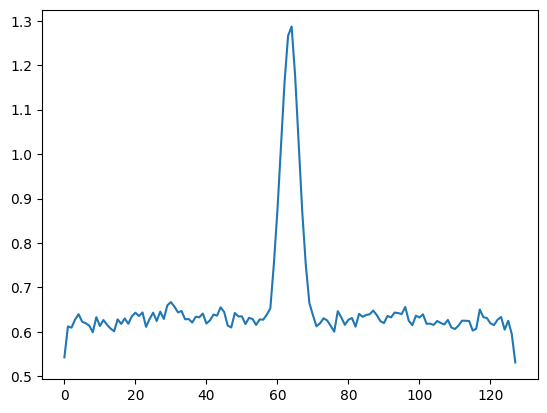

In [82]:
epoch = 50
bx = load_data_at_certain_t(field_dir+"bx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
by = load_data_at_certain_t(field_dir+"by.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
bz = load_data_at_certain_t(field_dir+"bz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
ni_c = load_data_at_certain_t(field_dir+"ni.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
ni_b = load_data_at_certain_t(field_dir+"ni2.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
babs = np.sqrt(bx**2+by**2+bz**2)
plt.plot((ni_b+ni_c)[10,:])

In [14]:
"""
PLOT VERTICAL CUTS OF THE FIELD AND PARTICLE DATA
"""
epoch = 50
# time_step = epoch*400
x_lst = np.linspace(0, 128, 21)
z_lst = np.linspace(-0.5,15.5, 17)
num_files=256
run_case_index = 77
field_dir = f"field_data/field_data_77/"
figs_dir = f"field_figs/trajs_{run_case_index}_epoch_{epoch}_x_15_anti_sun/"
nx, ny, nz = int(loadinfo(field_dir)[0]), int(loadinfo(field_dir)[1]), int(loadinfo(field_dir)[2])
print(nx, nz)
Lx, Ly, Lz = int(loadinfo(field_dir)[3]), int(loadinfo(field_dir)[4]), int(loadinfo(field_dir)[5])
hx, hy, hz = Lx/nx, Ly/ny, Lz/nz
step = epoch*400
bx = load_data_at_certain_t(field_dir+"bx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
by = load_data_at_certain_t(field_dir+"by.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
bz = load_data_at_certain_t(field_dir+"bz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
babs = np.sqrt(bx**2+by**2+bz**2)
ni_c = load_data_at_certain_t(field_dir+"ni.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
ni_b = load_data_at_certain_t(field_dir+"ni2.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
# ne = load_data_at_certain_t(field_dir+"ne.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
# jx = load_data_at_certain_t(field_dir+"jx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
# jy = load_data_at_certain_t(field_dir+"jy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
# jz = load_data_at_certain_t(field_dir+"jz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
jx, jy, jz = calculate_current_density(bx, by, bz, hx, hy, hz)
uix_c = load_data_at_certain_t(field_dir+"uix.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uiy_c = load_data_at_certain_t(field_dir+"uiy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uiz_c = load_data_at_certain_t(field_dir+"uiz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uix_b = load_data_at_certain_t(field_dir+"ui2x.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uiy_b = load_data_at_certain_t(field_dir+"ui2y.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uiz_b = load_data_at_certain_t(field_dir+"ui2z.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
uex = (uix_c*ni_c+uix_b*ni_b-jx)/(ni_c+ni_b)
uey = (uiy_c*ni_c+uiy_b*ni_b-jy)/(ni_c+ni_b)
uez = (uiz_c*ni_c+uiz_b*ni_b-jz)/(ni_c+ni_b)
Ux_total = (uix_c*ni_c+uix_b*ni_b)/(ni_c+ni_b)
pi_xx_c = load_data_at_certain_t(field_dir+"pi-xx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
pi_yy_c = load_data_at_certain_t(field_dir+"pi-yy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
pi_zz_c = load_data_at_certain_t(field_dir+"pi-zz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
pi_xx_b = load_data_at_certain_t(field_dir+"pi2-xx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
pi_yy_b = load_data_at_certain_t(field_dir+"pi2-yy.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
pi_zz_b = load_data_at_certain_t(field_dir+"pi2-zz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
Ti_c = (pi_xx_c+pi_yy_c+pi_zz_c)/3/ni_c
Ti_b = (pi_xx_b+pi_yy_b+pi_zz_b)/3/ni_b
# Ti_x, Ti_y, Ti_z = pi_xx/ni, pi_yy/ni, pi_zz/ni
print(hx,hz)
for i in range(len(z_lst)-1):
    print(i)
    #x_center = 0.5*(x_lst[i]+x_lst[i+1])
    x_center = 0.5*(10+20)
    z_center = 0.5*(z_lst[i]+z_lst[i+1])
    # z_center = 0
    # x_left, x_right, z_bottom, z_top = x_lst[i], x_lst[i+1], -0.5, 0.5
    delta_u=uix_b[int(x_center),int(z_center+nz//2)]-uix_c[int(x_center),int(z_center+nz//2)]
    x_left, x_right, z_bottom, z_top = 10, 20, z_lst[i], z_lst[i+1]
    base_fname_swi_c = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_c.{step}.{{}}"
    base_fname_swi_b = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_b.{step}.{{}}"
    p_c = Species(name="ion_c", fullname="Ion_core", filename=base_fname_swi_c, num_files=num_files, region=[x_left, x_right, z_bottom, z_top])
    p_b = Species(name="ion_b", fullname="Ion_beam", filename=base_fname_swi_b, num_files=num_files, region=[x_left, x_right, z_bottom, z_top])
    condition_b = region(p_b.x, p_b.z, x_left, x_right, z_bottom, z_top)
    condition_c = region(p_c.x, p_c.z, x_left, x_right, z_bottom, z_top)
    x_total, y_total, z_total = np.concatenate((p_c.x[condition_c], p_b.x[condition_b])), np.concatenate((p_c.y[condition_c], p_b.y[condition_b])), np.concatenate(
                (p_c.z[condition_c], p_b.z[condition_b]))
    ux_total, uy_total, uz_total = np.concatenate((p_c.ux[condition_c], p_b.ux[condition_b])), np.concatenate(
                (p_c.uy[condition_c], p_b.uy[condition_b])), np.concatenate((p_c.uz[condition_c], p_b.uz[condition_b]))
    counts_mat_b, xedges_b, zedges_b = np.histogram2d(p_b.ux[condition_b],
                                                        p_b.uz[condition_b],
                                                        bins=[80, 80],
                                                        range=[[np.min(p_b.ux), np.max(p_b.ux)],
                                                               [np.min(p_b.uz), np.max(p_b.uz)]])
    counts_mat_c, xedges_c, zedges_c = np.histogram2d(p_c.ux[condition_c],
                                                        p_c.uz[condition_c], bins=[80, 80],
                                                        range=[[np.min(p_c.ux), np.max(p_c.ux)],
                                                               [np.min(p_c.uz), np.max(p_c.uz)]])
    counts_mat_t, xedges_t, zedges_t = np.histogram2d(ux_total,
                                                        uz_total, bins=[80, 80],
                                                        range=[[np.min(ux_total), np.max(ux_total)],
                                                               [np.min(uz_total), np.max(uz_total)]])
    
    
    fig = plt.figure(figsize=(16,20))

# 使用gridspec创建2行3列的网格，但第一行只使用一个子图（横跨3列）
    gs = gridspec.GridSpec(6, 3, figure=fig, height_ratios=[1, 1, 1, 1, 1, 1])
    x_plot_range = np.array(range(0, nx//2), dtype=int)
    x_range_shift = np.array((x_plot_range+nx//2)%nx)
# 上方的子图（横跨3列）
    ax1 = fig.add_subplot(gs[0, :])
    ax1.streamplot(x[x_range_shift], z, mat_shift(bx)[x_range_shift, :].T, mat_shift(bz)[x_range_shift, :].T, color='k', density=0.5)
    pclr=ax1.pcolormesh(x[x_range_shift], z, mat_shift((ni_c*uix_c+ni_b*uix_b)/(ni_c+ni_b))[x_range_shift, :].T/v_A, cmap='bwr', vmin=-1.5, vmax=1.5)
    
    # cbar=plt.colorbar(pclr, ax=ax1)
    # cbar.set_label(r"$\Delta u_x/V_A$", fontsize=20)
    ax1.set_xlabel("x[di]",fontsize=15)
    ax1.set_ylabel("z[di]",fontsize=15)
    ax1.scatter((x_center+128)%256, z_center, color='k', s=70)
    ax1.axhline(y=0,linewidth=3,c='k',xmin=0.5, xmax=1)
    ax1.axvline((x_center+128)%256,linewidth=3,c='k',linestyle='--')
    ax = fig.add_subplot(gs[1,:])
    ax.plot(x[x_range_shift], uix_c[x_plot_range,nz//2]/v_A, label="core", c='b')
    ax.plot(x[x_range_shift], uix_b[x_plot_range,nz//2]/v_A, label="beam", c='r')
    ax.axvline(x_center+x[nx//2], c='k', linestyle='--',linewidth=3)
    ax.set_xlim([x[nx//2], x[-1]])
    # ax.set_xlim([x[0], x[nx//2]])
    ax.set_ylabel(r"$U_i$", fontsize=25)
    ax = fig.add_subplot(gs[2,:])
    ax.plot(x[x_range_shift], ni_c[x_plot_range,nz//2], label="core", c='b')
    ax.plot(x[x_range_shift], ni_b[x_plot_range,nz//2], label="beam", c='r')
    ax.axvline(x_center+x[nx//2], c='k', linestyle='--',linewidth=3)
    ax.set_xlim([x[nx//2], x[-1]])
    #ax.set_xlim([x[0], x[nx//2]])
    ax.set_ylabel(r"$n_i$", fontsize=25)
    ax = fig.add_subplot(gs[3,:])
    ax.plot(x[x_range_shift], Ti_c[x_plot_range,nz//2], label="core", c='b')
    ax.axvline(x_center+x[nx//2], c='k', linestyle='--',linewidth=3)
    ax.plot(x[x_range_shift], Ti_b[x_plot_range, nz//2], label="beam", c='r')
    ax.set_xlim([x[nx//2], x[-1]])
    # ax.set_xlim([x[0], x[nx//2]])
    ax.set_ylabel(r"$T_i$", fontsize=25)
    ax2 = fig.add_subplot(gs[4, 0])
    ctf = ax2.contourf(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), cmap="jet")
    ax2.contour(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax2)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax2.axis('equal')
    ax2.set_xlabel("vx", fontsize=20)
    ax2.set_ylabel("vz", fontsize=20)
    ax2.set_xlim([-3,3])
    ax3 = fig.add_subplot(gs[4, 1])
    ctf = ax3.contourf(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), cmap="jet")
    ax3.contour(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax3)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax3.set_xlabel("vx", fontsize=20)
    ax3.set_ylabel("vz", fontsize=20)
    ax3.axis('equal')
    ax4 = fig.add_subplot(gs[4, 2])
    ctf = ax4.contourf(xedges_b[1:], zedges_b[1:], np.log10(counts_mat_b.T), cmap="jet")
    ax4.contour(xedges_b[1:], zedges_b[1:], np.log10(counts_mat_b.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax4)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax4.set_xlabel("vx", fontsize=20)
    ax4.set_ylabel("vz", fontsize=20)
    counts_mat_b, xedges_b, yedges_b = np.histogram2d(p_b.ux[condition_b],
                                                        p_b.uy[condition_b],
                                                        bins=[80, 80],
                                                        range=[[np.min(p_b.ux), np.max(p_b.ux)],
                                                               [np.min(p_b.uy), np.max(p_b.uy)]])
    counts_mat_c, xedges_c, yedges_c = np.histogram2d(p_c.ux[condition_c],
                                                        p_c.uy[condition_c], bins=[80, 80],
                                                        range=[[np.min(p_c.ux), np.max(p_c.ux)],
                                                               [np.min(p_c.uy), np.max(p_c.uy)]])
    counts_mat_t, xedges_t, yedges_t = np.histogram2d(ux_total,
                                                        uy_total, bins=[80, 80],
                                                        range=[[np.min(ux_total), np.max(ux_total)],
                                                               [np.min(uy_total), np.max(uy_total)]])
    ax2 = fig.add_subplot(gs[5, 0])
    ctf = ax2.contourf(xedges_t[1:], yedges_t[1:], np.log10(counts_mat_t.T), cmap="jet")
    ax2.contour(xedges_t[1:], yedges_t[1:], np.log10(counts_mat_t.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax2)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax2.axis('equal')
    ax2.set_xlabel("vx", fontsize=20)
    ax2.set_ylabel("vy", fontsize=20)
    ax2.set_xlim([-3,3])
    ax3 = fig.add_subplot(gs[5, 1])
    ctf = ax3.contourf(xedges_c[1:], yedges_c[1:], np.log10(counts_mat_c.T), cmap="jet")
    ax3.contour(xedges_c[1:], yedges_c[1:], np.log10(counts_mat_c.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax3)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax3.axis('equal')
    ax3.set_xlabel("vx", fontsize=20)
    ax3.set_ylabel("vy", fontsize=20)
    ax3 = fig.add_subplot(gs[5, 2])
    ctf = ax3.contourf(xedges_b[1:], yedges_b[1:], np.log10(counts_mat_b.T), cmap="jet")
    ax3.contour(xedges_b[1:], yedges_b[1:], np.log10(counts_mat_b.T), colors="k")
    cbar = plt.colorbar(ctf, ax=ax3)
    cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
    ax3.axis('equal')
    ax3.set_xlabel("vx", fontsize=20)
    ax3.set_ylabel("vy", fontsize=20)
    plt.suptitle(fr"t={epoch}, {x_left+128}<x<{x_right+128}, z={z_center},$U_{{x,c}}-U_{{x,b}}$={delta_u:.2f}, U={Ux_total[int(x_center),int(z_center)+nz//2]/va0:.2f}$v_A$,$n/n_{{back}}$={(ni_b+ni_c)[int(x_center),int(z_center)+nz//2]/(ni_b+ni_c)[0,0]:.2f},|B|={babs[int(x_center),int(z_center)+nz//2]:.2f}", fontsize=15)
    if not os.path.exists(figs_dir):
        os.mkdir(figs_dir)
    plt.savefig(figs_dir+f"fig_{i}.png")
    plt.close()



256 128
1.0 0.25
0


C:\Users\mrwwn\AppData\Local\Temp\ipykernel_10812\3586162412.py:122: RuntimeWarning: divide by zero encountered in log10
  ctf = ax2.contourf(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), cmap="jet")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_10812\3586162412.py:123: RuntimeWarning: divide by zero encountered in log10
  ax2.contour(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), colors="k")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_10812\3586162412.py:131: RuntimeWarning: divide by zero encountered in log10
  ctf = ax3.contourf(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), cmap="jet")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_10812\3586162412.py:132: RuntimeWarning: divide by zero encountered in log10
  ax3.contour(xedges_c[1:], zedges_c[1:], np.log10(counts_mat_c.T), colors="k")
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_10812\3586162412.py:139: RuntimeWarning: divide by zero encountered in log10
  ctf = ax4.contourf(xedges_b[1:], zedges_b[1:], np.log10(cou

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


256 128
1.0


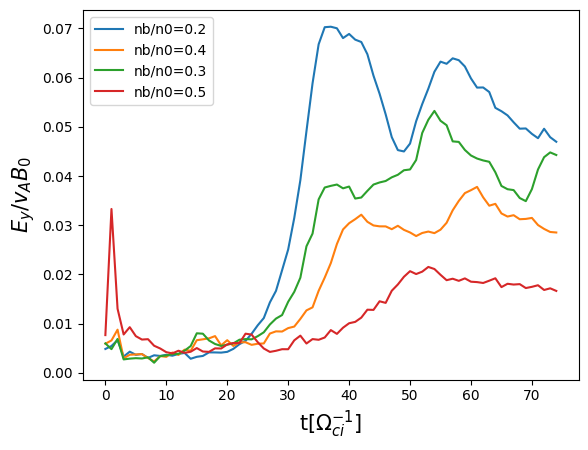

In [41]:
field_dir = "D:\Research\Codes\Hybrid-vpic\HybridVPIC-main/reconnection/field_data/field_data_79/"
field_dir_2 = "D:\Research\Codes\Hybrid-vpic\HybridVPIC-main/reconnection/field_data/field_data_70/"
field_dir_3 = "D:\Research\Codes\Hybrid-vpic\HybridVPIC-main/reconnection/field_data/field_data_73/"
field_dir_4 = "D:\Research\Codes\Hybrid-vpic\HybridVPIC-main/reconnection/field_data/field_data_74/"
nx, ny, nz = int(loadinfo(field_dir)[0]), int(loadinfo(field_dir)[1]), int(loadinfo(field_dir)[2])
print(nx, nz)
num_epoch =75
bx_total = load_data(field_dir+"bx.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
by_total = load_data(field_dir+"by.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
bz_total = load_data(field_dir+"bz.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
jx_total, jy_total, jz_total = calculate_current_density(bx_total, by_total, bz_total, hx, hy, hz)
ex_total = load_data(field_dir+"ex.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
ey_total = load_data(field_dir+"ey.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
ey_total_2 = load_data(field_dir_2+"ey.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
ey_total_3 = load_data(field_dir_3+"ey.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
ey_total_4 = load_data(field_dir_4+"ey.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
#jx_total = load_data(field_dir+"jx.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
# jy_total = load_data(field_dir+"jy.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
Ay_total = load_data(field_dir+"Ay.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
Ay_total_2 = load_data(field_dir_2+"Ay.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
Ay_total_3 = load_data(field_dir_3+"Ay.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
Ay_total_4 = load_data(field_dir_4+"Ay.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
ni_c_total = load_data(field_dir+"ni.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
ni_b_total = load_data(field_dir+"ni2.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
uix_c_total = load_data(field_dir+"uix.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
uix_b_total = load_data(field_dir+"ui2x.gda",num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
uex_total = (ni_c_total*uix_c_total+ni_b_total*uix_b_total-jx_total)/(ni_b_total+ni_c_total)
pi_xx = load_data(field_dir+"pi-xx.gda", num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
pi_yy = load_data(field_dir+"pi-yy.gda", num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
pi_zz = load_data(field_dir+"pi-zz.gda", num_dim1=nx, num_dim2=nz, num_dim3=num_epoch)
Ti = (pi_xx+pi_yy+pi_zz)/3/ni_c_total
rot_bx = -np.gradient(by_total, axis=1)/hx
print(hx)
# plt.plot(x, uex_total[:,nz//2,24])
# duix_dx = np.gradient(mat_shift(uix_total)[:,nz//2,:],axis=0)/hx
# ux_flux = uix_total[nx//2,nz//2,:]*ni_total[nx//2,nz//2,:]
# plt.plot(x,uix_b_total[:,nz//2,24]-uix_c_total[:,nz//2,24])
# plt.plot(x,uex_total[:,nz//2,24]-(uix_c_total[:,nz//2,24]*ni_c_total[:,nz//2,24]+uix_b_total[:,nz//2,24]*ni_b_total[:,nz//2,24])/(ni_c_total[:,nz//2,24]+ni_b_total[:,nz//2,24]))
# plt.plot(x,ni_c_total[:,nz//2,24])
# plt.plot(x,ni_b_total[:,nz//2,24])
# rot_by = np.gradient(bx_total, axis=1)/hz-np.gradient(bz_total, axis=0)/hx
# plt.plot(np.mean(duix_dx[nx//2-1:nx//2+2, :],axis=0)*np.sqrt(2*Ti[0,nz//2,:]))
# plt.plot(np.mean(mat_shift(ey_total)[nx//2-1:nx//2+2, nz//2,:],axis=0))
# plt.plot((-Ay_total_2[nx//2,nz//2,:]+Ay_total_2[0, nz//2, :]))
# plt.plot((-Ay_total_3[nx//2,nz//2,:]+Ay_total_3[0, nz//2, :]))
# plt.plot((-Ay_total_4[nx//2,nz//2,:]+Ay_total_4[0, nz//2, :]))
# plt.plot((-Ay_total[nx//2,nz//2,:]+Ay_total[0, nz//2, :]))
plt.plot(np.mean(ey_total_2[0,nz//2-1:nz//2+2,:], axis=0)*np.sqrt(0.2), label='nb/n0=0.2')
plt.plot(np.mean(ey_total_3[0,nz//2-1:nz//2+2,:], axis=0)*np.sqrt(0.4), label='nb/n0=0.4')
plt.plot(np.mean(ey_total_4[0,nz//2-1:nz//2+2,:], axis=0)*np.sqrt(0.3), label='nb/n0=0.3')
plt.plot(np.mean(ey_total[0,nz//2-1:nz//2+2,:], axis=0)*np.sqrt(0.5), label='nb/n0=0.5')
# pclr=plt.pcolormesh(x, z, rot_by[:,:,35].T-jy_total[:,:,35].T, cmap='bwr')
# # pclr=plt.pcolormesh(x, z, rot_by[:,:,15].T, cmap='bwr')
# plt.contour(x,z,Ay_total[:,:,15].T, levels=40, colors='k')
# plt.xlim([0,20])
# plt.colorbar(pclr)
plt.xlabel(r"t[$\Omega_{ci}^{-1}$]",fontsize=15)
plt.ylabel(r"$E_y/v_AB_0$",fontsize=15)
plt.legend()